In [1]:
# Import dependencies

# Pandas
import pandas as pd

# MatPlotLib
import matplotlib.pyplot as plt

#Numpy
import numpy as np

# SQLAlchemy
from sqlalchemy import create_engine

# Engine info for postgres
from config import (user, password, host, port, database)

In [2]:
# Create engine

engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [3]:
# Read employee table

employee_df = pd.read_sql("SELECT * FROM employees", conn)
employee_df.head()

,employee_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
# Read salary table

salary_df = pd.read_sql("SELECT * FROM salaries", conn)
salary_df.head()

,employee_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [5]:
# Read title table

title_df = pd.read_sql("SELECT * FROM titles", conn)
title_df.rename(columns={"title_id":"emp_title_id"}, inplace=True)
title_df

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [6]:
# Merge dataframes

employee_df = employee_df.merge(salary_df, how="inner", on="employee_no")
employee_df.head()

,employee_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [7]:
employee_df = employee_df.merge(title_df, how="inner", on="emp_title_id")
employee_df.head()

,employee_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


In [8]:
# Sort by salary

employee_df.sort_values(by="salary", axis=0, inplace=True)
employee_df.head()

,employee_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
155404,484992,e0003,1956-07-22,Bingning,Azuma,M,1993-11-14,40000,Senior Engineer
155408,12475,e0003,1953-03-30,Filipe,Roison,M,1987-04-26,40000,Senior Engineer
155410,293847,e0003,1956-09-02,Lijia,Schwartzburd,M,1989-05-21,40000,Senior Engineer
155412,424552,e0003,1955-02-25,Hairong,Schlegelmilch,M,1989-02-25,40000,Senior Engineer


In [9]:
employee_df.tail()

,employee_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
73441,37558,s0001,1963-08-16,Juichirou,Thambidurai,M,1989-02-23,125469,Staff
26790,458302,s0001,1955-06-04,Poorav,Esposito,M,1995-11-22,126703,Staff
42841,444756,s0001,1957-12-18,Nahid,Varker,M,1986-10-06,127041,Staff
258862,44188,s0002,1960-12-20,Slavian,Peac,M,1991-03-16,127238,Senior Staff
102427,205000,s0001,1956-01-14,Charmane,Griswold,M,1990-06-23,129492,Staff


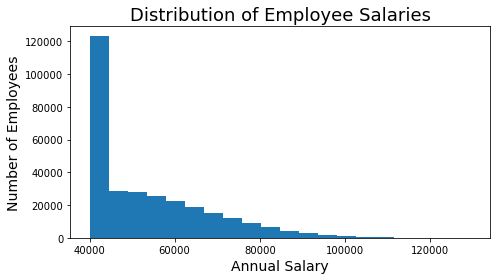

In [10]:
# Plot salary histogram

x=list(employee_df.salary)
bins=20

plt.figure(figsize=(7,4))
plt.hist(x, bins=bins)
plt.title("Distribution of Employee Salaries", fontsize=18)
plt.xlabel("Annual Salary", fontsize=14)
plt.ylabel("Number of Employees", fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
# Group employees by title

title_groups = employee_df.groupby(employee_df.title)
avg_salary = round(title_groups.salary.mean())
avg_salary_df = pd.DataFrame(avg_salary)
avg_salary_df

,salary
title,
Assistant Engineer,48564.0
Engineer,48535.0
Manager,51531.0
Senior Engineer,48507.0
Senior Staff,58550.0
Staff,58465.0
Technique Leader,48583.0


In [12]:
# Create bar chart

x = np.arange(1,8,1)
y = list(avg_salary_df["salary"])
print(y)

[48564.0, 48535.0, 51531.0, 48507.0, 58550.0, 58465.0, 48583.0]


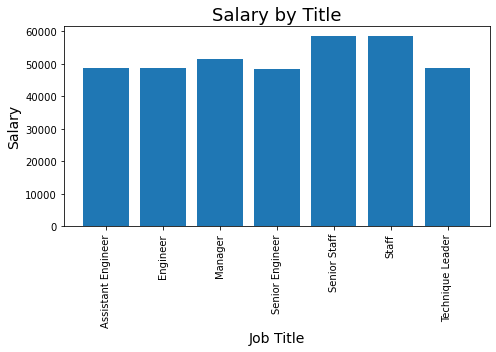

In [13]:
plt.figure(figsize=(7,5))
tick_locations = [value for value in x]
plt.bar(x, y)
plt.title("Salary by Title", fontsize=18)
plt.xticks(tick_locations, avg_salary_df.index, rotation="vertical")
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.tight_layout()
plt.show()